# Random Number Generators and Seeding

We now turn to a new topic: generating and using random numbers. We will first look at generating randomness in our programs. Later, we explore examples of randomness being used for different algorithms and scientific problems and, finally, we discuss how to approach testing on stochastic systems.

Randomness is relevant for many scientific and computing-related applications. Most games, for example, have a considerable component of randomness. *Cryptography*, as another example, relies heavily on the unpredictable power of randomness and is needed to communicate securely, a crucial component of everything on the internet. As will be discussed, random algorithms often need access to draw elements or samples at random.

Randomness is a valuable commodity and we, therefore, need to know how to generate it.


## Some History

People have been generating random numbers by mechanical means for millennia, for example, by throwing dice, spinning roulette wheels, and shuffling cards. While these techniques might mostly be connected to games and gambling, we can use them to produce randomness for scientific studies and statistics.

However, producing random numbers by rolling a die is cumbersome and time-consuming. Random number tables were often used to get around this and make generating randomness easier. These were numbers randomly generated and later on tabulated into large tables. As the tables are already random, the order by which they are read is unimportant. One can go by row, column, or diagonally, for example. Access to a random number table makes life easier if whenever a few random samples are needed.

To emphasize the importance of random numbers, we should mention the book *A Million Random Digits with 100,000 Normal Deviates*, first published in 1955 by the RAND company. As the name implies, this is a book containing a million random digits. Interestingly, this book was considered quite groundbreaking, as it enabled more people to access a larger number of random numbers than ever before.


```{figure} ../../figures/RAND.jpg
---
width: 400px
name: RAND
alt: RAND
---
```


The RAND's cooperation's book is a historical example of the importance of randomness and has recently seen a new print edition in 2001 with a new foreword. The book has many humorous [reviews on Amazon](https://www.amazon.com/Million-Random-Digits-Normal-Deviates/product-reviews/0833030477/).


## Randomness on Computers

With the advent of computers and computing, it was clear that having access to random numbers in a computer program would also be a valuable asset. However, this was a particularly difficult challenge since computers were created to be entirely stable and *deterministic*. There was simply no way for a computer to produce a random number from nothingness.

The solution was to "import" random numbers from outside sources. The *A million random digits*  book, for example, also came in the format of punch cards, so that they could be read into the computer's memory and used by a program. This process was, however, very slow, and having access to a sufficient amount of random numbers was challenging.

Where did this imported randomness actually come from? These were taken from some physical setup that measured some seemingly random process. For the *A million random digits* example, they were taken from an electric roulette wheel connected to a large computer that kept spinning the wheel and noting the results. In modern days, many other physical systems for randomness have been proposed and used. Lava lamps, for example, were popular, as the movement of the "lava" breaking up and merging can be measured by an electric sensor and seemingly produces random outputs. Other options are counting radioactive decay with a Geiger counter and looking at thermal fluctuations or quantum mechanical noise. These are just some examples, and there are countless more.

Physical means of producing random numbers are still used today. The website [random.org](https://www.random.org/), for example, uses *atmospheric noise* to generate random numbers. The noise is measured by radio and tabulated into random number tables, which are then used when randomness is needed.


## Pseudorandomness

While there are many techniques for measuring physical randomness and using it, there are some problems with these techniques, which we will explain later. An alternative is to let the computer produce its own random numbers.

As mentioned, this is problematic since computers are fully deterministic machines. There is no way for a computer to produce non-deterministic randomness if it is not connected to some physical RNG. However, in scientific programming, what we care about in our random numbers is the *statistics*. That means that if we can get the computer to produce numbers that look and behave like random numbers in a statistical sense, they will be sufficient for our purposes. We call these *statistically* random numbers, and this concept is called *statistical randomness*.

We will now look at examples of how a computer can produce *statistical randomness* that is sufficient for scientific applications. These are, however, completely deterministic processes and, to emphasize that, this type of randomness is popularly called *pseudorandomness*.

Any system that produces random numbers is called a *random number generator* or RNG for short. To emphasize that a software-based RNG produces pseudorandom numbers, it is often designated a PRNG/pRNG for pseudorandom number generator.


## Pseudorandom Number Generators

We will now start looking at how to implement a pRNG on a computer. To do that, we implement some rules for producing a sequence of numbers from a starting one. These numbers are generated sequentially, so the second number is used to produce a third one, and so on. A pRNG is effectively a *difference* equation that produces a sequence of numbers.

We desire to generate a statistically random sequence. Then, whatever rule or algorithm we use to find the following number in the sequence should produce a number that is *uncorrelated* from the previous one. Put simply, each new number in the sequence should "look" random.

As mentioned, the pRNG should have a starting number. This is called the *seed* of the pRNG, and it is up to the user to supply this seed. We will later discuss the seed, but for now, we pick some arbitrary number.


### The Middle-Square Method

One of the first examples of a computer-implemented pRNG was proposed by John von Neumann and is called the *middle-square method*. In this method, you find the next number in the sequence by first squaring your number, and then extracting the middle from that result.

To generate such a sequence, we need to start somewhere. Suppose we start with the number

$$X_0 = 4096.$$

We can now find the next number in the sequence by first squaring:

$$X_0^2 = 16777216,$$

and then extracting the middle digits. Because we started with a 4-digit number, we extract the middlemost 4 digits. Meaning the next number in the sequence becomes

$$X_1 = 7772.$$

We can now perform another iteration. Note that we now use the previous result as the point to continue from

$$X_1^2 = 60403984.$$

Extracting the middlemost 4 digits now gives

$$X_2 = 4039.$$

Let us implement this process in Python:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def next_number(current):
    current **= 2
    return int(str(current)[2:6])


X = np.zeros(21)
X[0] = 4096

for i in range(20):
    X[i + 1] = next_number(X[i])

print(X)

[4096. 7772. 4039. 3135. 2822. 6368. 5514. 4041. 3296. 8636. 5804. 6864.
 1144.  873. 2129. 3264. 6536. 7192. 7248. 5335. 4622.]


The middle-square method has some glaring faults, which means it does not work too well as a pRNG in practice. However, this discussion is outside the scope of this section.

Despite its issues, the algorithm proposed by von Neumann generates sequences of numbers that *look* random in a statistical sense. His method was both easy to implement and very fast. For its purposes, the technique worked well. Compared to reading random numbers from punch cards, von Neumann found that his method was more than a hundred times faster.

After von Neumann, many other pRNGs have been proposed, but they all behave in the same manner: they produce statistically random numbers in a sequence by performing a set of operations on the previous number in the sequence.


### Linear Congruential Generators

While the middle-square method was a very original idea, it did not stand the test of time. Another pRNG that did, however, which is perhaps even simpler than the middle-square method, is the linear congruential generator (LCG).

LCGs are a whole family of pRGNs that are easy to implement and fast. If they are designed, implemented, and used correctly, they produce fairly good random numbers. This method has historically been very important and still sees some use today. Furthermore, while LCGs are by no means considered the *best* option out there today, they are still considered good for certain use cases. For a brief yet sufficient discussion about Linear Congruential Generators, see the [Encyclopedia of Cryptography and Security](https://link.springer.com/referenceworkentry/10.1007/978-1-4419-5906-5_354#citeas) {cite}`van2014encyclopedia`.


As we mentioned, LCGs are a *family* of generators. They all produce random integers by following the governing difference equation:

$$X_{n+1} = (a X_n + c) \mod m.$$

From this formula, it becomes clear that there are three steps to producing a new number with an LCG:
1. The multiplier: multiply the current number by $a$
2. The increment: add the constant $c$
3. The modulus: take the modulo with $m$

The choice of these three adjustable parameters is what defines a specific LCG. All three parameters must be integers. Furthermore, $m$ and $a$ must be positive and respect the relation $a < m$, while $c$ must be non-negative and follow $c < m$.

We call these pRNGs *linear* generators because this difference equation is a linear equation. Strictly speaking, the modulo operator makes it a discontinuous, piecewise linear equation. Setting $c = 0$ results in a sub-family of LCGs called *multiplicative congruential generator* (MCG).


### Choice of parameters

It is important to stress that the parameters $a$, $m$ and $c$ should not be chosen freely, but must be rather carefully selected, if we want to end up with a good pRNG. We will later return to this and explain what defines a "good" choice. For now, we take the parameters given in the book *Numerical Recipes* {cite}`press2007numerical`

```{figure} ../../figures/numerical_recipes.jpg
---
width: 250px
name: numerical_recipes
alt: numerical_recipes
---
```

In the book, the following parameters for an LCG are proposed:

$$\begin{align}
m &= 2^{32}, \\
a &= 1664525, \\
c &= 1013904223.
\end{align}$$

In [3]:
def next_number(current):
    m = 2**32
    a = 1664525
    c = 1013904223
    return (a * current + c) % m


X = np.empty(101, dtype=int)
X[0] = 10981

for i in range(100):
    X[i + 1] = next_number(X[i])

print(X)

[     10981 2112184064 1273939551 2581585970  620970473 3650953780
 1008625667 2411097478 3932940077 3043663528 1819800039  678905370
 2834685617 2263795804 3412051979 1125350894 3034000501 2122306384
  971935343  589523202 1648628857 1507668868 4145359123  968530774
 2956139197  673422584 3405822967  830204138 3714122561 1929446316
 3602819867 3521996222 1804915205 2166922144  740334207 2383177170
 1428409097 2785466580 2447404579 3525410086 2025157197 3535105864
  402934279 1691647930 2135395281 3694088956 1619169835 1870692750
 3228703637  717535216 3223710351   29873826 3907741081 3335459364
 2612082483  610800374 1733029341 4138014104 2772671511 3477998218
 3809638497 3788420684 3724311867 1458164062 1105725733 3984140352
 2145353375  616741746 4280542249 3324698484  871924803 3477822662
 3650063725 1253543912  952087079 3841296730  459983089 3430165916
 1555917899 4270216494   11508405 1487596688 4050540207 3970569282
 4288038585 4283384004  442979667  348674710 4149825789 125736

We see that the *Numerical Recipes* LCG produces large integers, that at least to the naked eye, seem fairly random. We will return to the topic on how to check wether they are statistically random a bit later.

First, in order to improve the algorithm's implementation, it is convenient to use object-oriented programming.

## Encapsulation

So far, both pRNG examples have used the previous number in the sequence to produce the next one. This is inconvenient for the user and can incur errors since inputting a wrong number to the function propagates unpredictably.

To fix this, we turn to object-oriented programming and use the concept of encapsulation to create a pRNG that only spits numbers out. We now introduce some terminology. The "current" pRNG's number is called the pRNG's *state*, and its starting point, or starting state, is called the *seed*. The user should still supply this, but only once.

In [4]:
class NumRecipesLCG:
    def __init__(self, seed):
        self.state = seed
        self.m = 2**32
        self.a = 1664525
        self.c = 1013904223

    def __call__(self):
        self.state = (self.a * self.state + self.c) % self.m
        return self.state

Our class is fairly simple. We have a constructor that takes in a given seed and sets the current state to it. We also implement a special method, call, that takes in the state of the pRNG, advances it one step, then returns it.

From the outside, we can now initialize a specific pRNG object by seeding it and then calling it to produce random integers. This is an example of *encapsulation*. What happens to the internal state, as we call the object, is of no concern from the outside.

In [5]:
random = NumRecipesLCG(2401293)

for i in range(10):
    print(random())

3706549768
2555191751
4060282
3471243665
616719804
2117273067
2371150414
1434944853
2562561712
1061796431


### Possible Outcomes

Now, the created LCG spits out several large integers. It is, however, hard to predict its next number, and to have any use of the outputted numbers, the range of possible outcomes should be known, at least.

To compute the next number in the sequence, we multiply the current state by $a = 1664525$, and then increment it by $c = 1013904223$. Both of these are massive numbers, so we would expect the system's state to grow by quite a large margin. However, since the last step is to take the modulo, the system does not grow beyond all bounds.

$$X_{n+1} = aX_n + c \mod m.$$

Taking the modulo of a number means finding the remainder after division. It is an important operation in number theory and a brief use case can be found in [Programming for Computations](https://library.oapen.org/handle/20.500.12657/23103) {cite}`linge2020programming` by Linge, *Chapter 2.2.7 Division—Quotient and Remainder*. We will not cover it in detail here, but a good analogy for the modulo operation is a clock. A normal clock face shows numbers in the range $[0, 12)$. Once it goes beyond 12, it starts back at 0. This is effectively a modulo operation. For example, 17:00 on a 24-hour clock would be $17 \ \text{mod}\ 12 = 5$ on a 12-hour clock.

In our LCG, we always take the modulo with $m$. This means, just like for the clock, every time the state grows beyond $m$, it "loops back around". Thus, we are guaranteed that any number output by our LCG will be in the range:

$$[0, m),$$

or, for our given choice of parameters,

$$[0, 2^{32}) = [0, 4294967296).$$

This gives a range of possible values our LCG can output. We are not guaranteed, for example, that every single integer in this range will be output. Nevertheless, assuming that this is the case, the range $[0, 2^{32})$ includes, exactly, $2^{32}$ integers. If all values in this range are possible outputs, the LCG can yield $2^{32}$ different outcomes. For our LCG to be considered statistically random, we would want all of these outcomes to be equally likely.

The final step of doing the modulo operation allows us to envision our LCG working by spinning the handle of a clock around. Because we multiply $a$ by the previous state $X$, the amount the handle moves in the next iteration is not constant, but dependent on the pseudorandom number $X$. This displacement of the handle by a random amount around the clock is what gives the next number in the sequence.

An interesting question is why we have chosen exactly $m = 2^{32}$ as our range. Recall that an `int` in C++, and most other programming languages, is precisely 32 bits. As a bit can be either 0 or 1, that means a normal integer in most programming languages can have $2^{32}$ possible values. As we draw non-negative numbers, our LCG produces unsigned integers. These can, however, be stored in an unsigned int variable, which we define in C++ as `unsigned int`. In other words, by choosing $m = 2^{32}$, we are producing exactly one possible 32-bits integer value.

Based on this, it should not come as a surprise that another popular choice for the modulus is $m = 2^{64}$, which is the size of a `long` integer in C++ and other programming languages. A benefit of sticking to moduli that are strictly powers of $2^n$ is that computing their modulus is as simple as throwing away the unimportant bits (a process known as *truncating*). This is extremely fast on a computer (much faster than computing the actual modulo), and choosing $m = 2^n$ will therefore give a fast LCG.


## Transforming Numbers

Now, let us look at how to actually use these huge integers output by our LCG. As we are rarely interested in huge integers in our algorithms, we need some way to *translate* our randomness to whatever format we require.

An important form of randomness we often require is real numbers in the range $[0, 1)$. For our LCG, computing such values is actually not that difficult. We know that an LCG will produce integers in the range $[0, m)$, and so we can convert these to random floating points in the range $[0, 1)$ by dividing by $m$:

In [6]:
random = NumRecipesLCG(2401293)

m = 2**32
for i in range(10):
    print(random() / m)

0.8629983682185411
0.5949269400443882
0.0009453580714762211
0.8082118968013674
0.14359126891940832
0.49296605098061264
0.5520764770917594
0.33409913373179734
0.5966428928077221
0.24721874645911157


This transformation from random integers to random floats is just a mapping of values. In theory, all the $m$ possible integers should map to $m$ different decimal values evenly distributed over the range $[0, 1)$. However, with the limited precision of floating point numbers, this is not guaranteed. In fact, if we wanted to ensure our pRNG was doing a good job on this task, we would need to really analyze the floating point behavior. However, let us ignore such details for now.


What if we want random integers in a different interval than $[0, m)$? We could wish to have 100 different outcomes or want to roll a die and have 6 outcomes, for example. One way to shift a number from the interval $[0, m)$ to a larger interval $[0, 100)$ is to use modulo:

In [7]:
random = NumRecipesLCG(240141556)

for i in range(5):
    r = random()
    print(f"{r:10} -> {r % 100:4}")

2916068291 ->   91
2490719814 ->   14
3200950509 ->    9
1610386792 ->   92
2344718759 ->   59


While this output might seem reasonable, we need to be careful when transforming the numbers this way, since the number of possible values might not be divisible by 100. Indeed, for our pRNG:

$$2^{32} = 4294967296$$

which does not evenly divide 100, but has a remainder of 96. This means that when transforming from all possible outcomes to the range $[0, m)$, there will be an exceptionally slightly lowered chance of getting the numbers 97, 98, or 99.

We might try to get smart and first convert our ints to floats on the interval $[0, 1)$, and then convert the back into integers as in the example above

In [8]:
random = NumRecipesLCG(240141556)

m = 2**32
for i in range(5):
    r = random() / m
    print(f"{r:5.5f} -> {r*100:4}")

0.67895 -> 67.89500571321696
0.57992 -> 57.991589745506644
0.74528 -> 74.52793673146516
0.37495 -> 37.49473933130503
0.54592 -> 54.59223778452724


However, this also cannot be a good solution, and we have not actually solved our problems, but just hidden them from sight. Our pRNG outputs $2^{32}$ possible values. Because this number is not divisible by 100, there is simply no way to divide these outputs into 100 values cleanly. It does not matter if we use fancy math or clever tricks.

If we want to have numbers uniformly spread in the range $[0, 100)$, the only proper solution would be to throw out some of our pRNG's output, so that we do get an equal number of values into each wanted outcome.

Note that this is *not* a problem with our pRNG, which might be outputting perfectly statistically random samples. It is, in reality, a problem that arises when trying to divvy up numbers into an impossible number of allotments. This is an example of something called the [Pigeonhole Principle](https://openlearninglibrary.mit.edu/courses/course-v1:OCW+6.042J+2T2019/courseware/4676c70972d94cd19b455a4bad0bf694/40607a57903e4b629ba240c123878112/?activate_block_id=block-v1%3AOCW%2B6.042J%2B2T2019%2Btype%40sequential%2Bblock%4040607a57903e4b629ba240c123878112) in mathematics. If you try to divide up

$$2^{32} = 4294967296,$$

Pigeons into 100 pigeonholes, there is no way to get an equal number of pigeons into each hole.

```{figure} ../../figures/TooManyPigeons.jpg
---
width: 300px
name: TooManyPigeons
alt: TooManyPigeons
---
Picture by [Ben Frantz Dale](https://en.wikipedia.org/wiki/Pigeonhole_principle#/media/File:TooManyPigeons.jpg) and used under a [CC BY-SA 3.0](https://creativecommons.org/licenses/by-sa/3.0/) license.
```


### Random numbers following a given distribution

We have now seen how we can use a pRNG to get random outputs of either integers on a range $[0, m)$, or uniformly distributed random floats in the range $[0, 1)$.

However, often we want random numbers following some other distribution. Perhaps we want standard normally distributed numbers. Or numbers following a Poisson distribution or Bernoulli-distributed numbers.

Our randomly generated numbers can be translated to any such distribution using different techniques, algorithms, or methods. The important thing is that the *randomness* itself is already generated. The remaining steps are just converting how it is understood or interpreted. Because of this, one sometimes talks about producing random numbers simply as producing random *bits*, to make it clear that the produced randomness itself is just information.

How uniform random numbers on the interval $[0, 1)$ can be transformed to other distributions, say randomly distributed numbers with a standard deviation of 3.6 and a mean of 4.7, is not a big topic of this course. That is because the problem itself is a statistical or mathematical one. However, we cover one example to convey how it can be done.

If the reader has a good familiarity with statistics, notice that it is possible to generate random numbers from any probability distribution given its cumulative distribution function through a process called [inverse transform sampling](https://cs.brown.edu/courses/cs1951k/lectures/2020/inverse_transform_sampling.pdf).


### Uniform distribution in the range $[a, b)$.

If we have uniformly distributed numbers in the range $[0, 1)$, we can easily shift them to any other uniform distribution simply by multiplying and shifting.

Say, for example, we are interested in the range $[-2, 2)$. We can first scale the range $[0, 1)$ to $[0, 4)$ by multiplying any sample $X$ by 4: $4x$. Then we shift every point down by 2, so if $X$ is a random number in the range $[0, 1)$, then $4 X - 2$ is a random number on $[-2, 2)$.

This holds for any $a$ and $b$. If we want random numbers in the range $[a, b)$, we can scale the sample outputted by our pRNG according to the formula:

$$(b - a)X + a.$$


### The Box-Muller Algorithm for finding Normally distributed numbers

Just to show an example of a much-used transformation algorithm, we cover the *Box-Muller* algorithm, which produces normally distributed numbers with a standard deviation of 1, and a mean of 0, i.e., the standard normal distribution.

The algorithm itself is based on a clever geometric idea, which can be further investigated in Sheldon Ross, A First Course in Probability {cite}`ross2019first`, Section 10.2: Simulating Continuous Random Variables.

In Box-Muller, we use two randomly generated independent points in the range $[0, 1)$: $U_1$ and $U_2$, to produce two randomly generated independent normally distributed points: $Z_1$ and $Z_2$.

This is done through the formula:

$$\begin{align}
    Z_1 = \sqrt{-2 \ln U_1}\cos (2\pi U_2), \\
    Z_2 = \sqrt{-2 \ln U_1}\sin (2\pi U_2).
\end{align}$$

Let us look at an example:

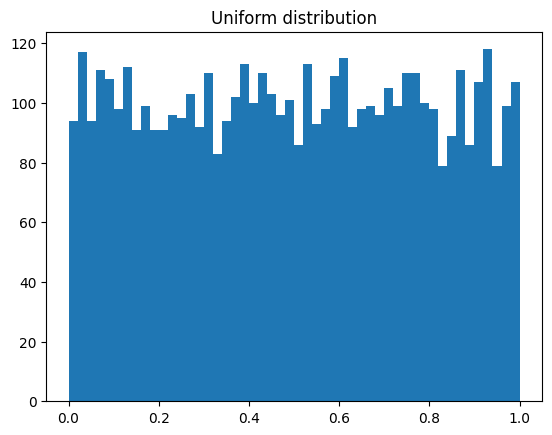

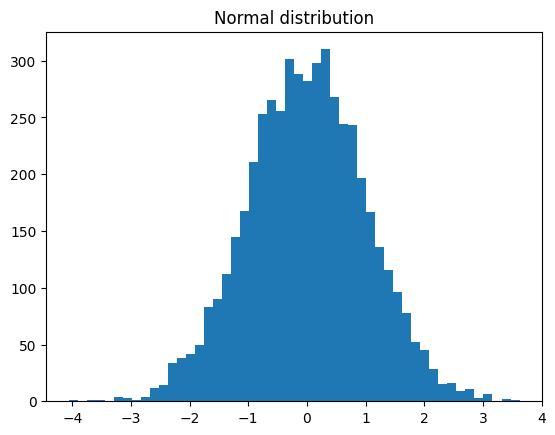

In [9]:
nr_samples = 5000
assert nr_samples % 2 == 0

# Generate uniform samples
seed = 240156
random = NumRecipesLCG(seed)
uniform_samples = np.empty(nr_samples)
m = 2**32
for i in range(nr_samples):
    uniform_samples[i] = random() / m

# Use Box-Muller to transform to normal distributed numbers
normal_samples = np.empty(nr_samples)
for i in range(0, nr_samples, 2):
    U1 = uniform_samples[i]
    U2 = uniform_samples[i + 1]
    Z1 = np.sqrt(-2 * np.log(U1)) * np.cos(2 * np.pi * U2)
    Z2 = np.sqrt(-2 * np.log(U1)) * np.sin(2 * np.pi * U2)
    normal_samples[i] = Z1
    normal_samples[i + 1] = Z2


plt.hist(uniform_samples, bins=50)
plt.title("Uniform distribution")
plt.show()

plt.hist(normal_samples, bins=50)
plt.title("Normal distribution")
plt.show()

If we want to shift the standard deviation of the normal distribution or its mean, we can simply multiply each sample by $\sigma$, and if we want to move the mean, we simply add $\mu$ to each sample.


## Seeding and Reproducibility

We have seen that a pRNG needs to start at a given *seed state* to be able to produce a sequence of pseudorandom numbers. It is up to the user of the system to select a seed, and feed it into the pRNG. The choice of the seed will impact what sequence of numbers we get. If we choose a different seed, we get a different sequence out.

Because each iteration of the pRNG is a deterministic computation, if we choose the *same seed state*, we get the same exact output. You might have noticed this already, if you execute the same examples in this notebook so far, we get the exact same output, the "random" numbers do not change whatsoever until the seed is changed.

The fact that "random" numbers do not change on execution, but are 100% determined by the seed might feel like a major flaw of the system. However, recall that the goal is not to produce *true* random numbers, but *statistically* random numbers. The fact that the seed perfectly predicts the outcome is actually a major benefit!

Because the same seed produces the same "random" sequence, it means that the code is *reproducible* and much easier to test. In fact, this is one of the big reasons pRNGs exist in the first place. Von Neumann developed the middle-square method not only for speed, but also because he found it impossible to test and reproduce his code run with punch-cards-supplied random numbers. Of course, he could simply write down the supplied sequence of random numbers into the program, but the computer did not have close to enough memory to remember all these numbers. With his method, however, to reproduce and test the program, one would simply need to remember a single number, the *seed state*.

A contemporary example of this is the game Minecraft. In Minecraft, the whole world is *procedurally generated*, meaning the world one starts in is randomly generated following a set of rules. Consequently, every new Minecraft game has a completely unique world. Given the *seed* state of the world, however, it is possible to recreate a previously encountered map. This seed is, in essence, a very long number.

## Periodicity of a pRNG

There is an interesting consequence of a pRNG being completely deterministic. If you when iterating through and generating a sequence of random numbers, end up at the *same* number, you have effectively returned to your seed state. From this point onwards, your sequence will just repeat the exact same values!

This can be illustrated with a very simple LCG, given $m = 9$, $a = 2$, $c = 1$

In [10]:
import time
import math


class SimpleLCG:
    """Linear congruential generator."""

    def __init__(self, a, c, m, seed=None):
        self._a = a
        self._c = c
        self._m = m
        if seed is None:
            self._state = int(time.time()) % self.m
        else:
            self._state = seed

    @property
    def a(self):
        return self._a

    @property
    def c(self):
        return self._c

    @property
    def m(self):
        return self._m

    def advance(self):
        """Advance internal state X."""
        self._state = (self.a * self._state + self.c) % self.m

    def __call__(self):
        """Advance and return internal state X."""
        self.advance()
        return self._state


ST = {"a": 2, "c": 1, "m": 9, "seed": 6}
random = SimpleLCG(**ST)
for i in range(16):
    print(random())

4
0
1
3
7
6
4
0
1
3
7
6
4
0
1
3


In the above sequence, the number $6$ was given as a seed for the pRNG, and while iterating and producing new values, it eventually appears again. From that point onwards, the sequence simply repeats itself in the same manner. This is a significant problem since an important quality of *statistical randomness* is that numbers are uncorrelated, and this example shows big correlations in our datasets.

```{figure} ../../figures/xkcd_221.png
---
width: 400px
name: xkcd_221
alt: xkcd_221
---
Source: [XKCD #221](https://xkcd.com/221/)
```


The number of values a pRNG produces before it repeats itself is called its *period*. For the above example, the period was 6, because it produced six numbers before repeating itself. It is important to not exhaust its period when using a pRNG.

The previous LCG was purposefully very simple, to illustrate a short period. Nevertheless, note that while this LCG technically has 9 possible outcomes, because $m = 9$, the period is shorter than 9. This is true for any LCG: If an LCG has $m = 2^{32}$, its period is *at most* $2^{32}$, and the explanation, again, relies on the Pigeonhole principle. The only way of forcefully returning a repeated number on try $2^{32} + 1$ is if all other $2^{32}$ options have been exhausted.

Thus, for an LCG, the period is at *most* $2^{32}$, but it can be much shorter. And this is where good choices of $a$ and $c$ come in, as we want to choose values that maximize the period. Note also that the seed impacts the period. Normally, when talking about the *period* of a pRNG, we refer to the longest possible period, given the choice of the right seed. Seeds that produce cycles of shorter periods than the ideal are often called *bad seed states*. A good pRNG should not have *bad seed states*, because it is unreasonable to assume the user knows which seeds to avoid.


For the next section, the infamous RANDU pRNG will be discussed, and it will become clear that it is an LCG with $a = 65539$, $m = 2^{31}$, and $c = 0$. These choices of parameters turned out to be bad, and in general, to get a better LCG, these parameters should not be arbitrarily chosen but instead looked up. For this purpose, there exist articles, such as ["Tables of linear congruential generators of different sizes and good lattice structure"](https://www.ams.org/journals/mcom/1999-68-225/S0025-5718-99-00996-5/home.html) {cite}`l1999tables`, listing several of the most commonly used parameters.


## The Infamous RANDU pRNG

Perhaps the most notorious pRNG is RANDU, a linear congruential generator made by IBM in the 1960s.

RANDU was created to be especially fast on certain hardware that was commonplace at the time. It chose the parameters $c = 0$, $a = 65539$ and $m = 2^{31}$. Note also that it has to be seeded with an odd number:

In [11]:
class RANDU:
    def __init__(self, seed):
        assert seed % 2 == 1
        self._state = seed
        self._a = 65539
        self._m = 2**31

    @property
    def a(self):
        return self._a

    @property
    def m(self):
        return self._m

    def __call__(self):
        self._state = self.a * self._state % self.m
        return self._state


rand = RANDU(41451)
for i in range(5):
    print(rand())

569173441
1267183939
333059017
1331116891
694202897


Looking at these numbers, they appear the same as the ones produced by the "Numerical Recipes" LCG shown earlier. However, it turned out that IBM chose sub-optimal parameters, and RANDU produced highly correlated numbers. Quoting [Donald Ervin Knuth](https://dl.acm.org/doi/book/10.5555/260999):
> IBM's RANDU is widely considered to be one of the most ill-conceived random number generators ever designed and was described as "truly horrible" by Donald Knuth. It fails the spectral test badly for dimensions greater than 2, and every integer result is odd.

The "spectral test" was designed to assess the quality of LCGs, such as RANDU. A good pRNG can be used to display random points in a unit cube, in which case the points will be uniformly spread out. If, however, a bad pRNG is used, (i.e., if there is a correlation between the different produced samples), these random points give rise to specific patterns. For most pRNGs, high dimensions are necessary for the patterns to be apparent, but for RANDU, they show up even in 3D.


```{figure} ../../figures/randu_planes.png
---
width: 700px
name: randu_planes
alt: randu_planes
---
(Left) For a "good" pRNG, like the one used by `np.random`, we can see no discernible patterns in the random samples, i.e., they are uncorrelated. (Right) RANDU however, fails this test, as we can see the points line up into 15 parallel planes.
```


At the time of RANDU's creation, not enough diligence was put into verifying its properties. And because of its simplicity and speed, it was quite popular in the 60s and 70s. Consequently, many scientific results that rely on stochastic simulations from that time are seen with skepticism.


## State vs Output

In all examples so far, the *state* of the pRNG is simply the previously outputted number. However, there is a problem with this approach, because it means we cannot get *repeated* outcomes. For any truly random sequence, repeated outcomes are sometimes expected.

The solution to this problem is to create a pRNG that has a larger internal state, and returns only parts of that state. For example, an LCG might use a modulus of $m = 2^{64}$, meaning the state has 64 bits of information. However, when actually returning the output to the user, it might only use certain parts of this number, such as extracting $48$ bits of information. For an LCG, it is common to return the most significant bits in this way, because it can be shown that these bits have a longer period than the lower bits.

By only returning parts of the state, we ensure that we can actually get the same output multiple times, without the state being the same and producing a short period.

A well-known pRNG test related to the problem is *the birthday test*, which inherits its name from the Birthday problem. For an excellent description of this problem, see [Lecture 3](https://www.youtube.com/watch?v=LZ5Wergp_PA&list=PL2SOU6wwxB0uwwH80KTQ6ht66KWxbzTIo&index=3) from Harvard's introductory course on probability, Statistics 110. The Birthday problem is as follows: In a room of $n$ people, what is the chance that at least two people share the same birthday? Assuming that people's birthdays in the room are random, it effectively asks the chance of drawing the same random sample from a distribution.

The Birthday problem has a surprising answer: with only 23 people in the room, there is a higher than 50% chance that two people share a birthday, increasing to a staggering 99.9% with just 70 people! By generalizing the problem, we can test whether a pRNG gives us the expected number of repeated samples for a given distribution. Many simpler pRNGs fail the birthday test.


## Mersenne Twister

Until this point, much has been said about LCGs, which despite being historically significant and used, are considered slightly outdated. The article [Computationally easy, spectrally good multipliers for congruential pseudorandom number generators](https://arxiv.org/abs/2001.05304) {cite}`steele2022computationally` on LCGs mentions several commonly used LCGs today, one of which is present in the programming language Java.

In Python, however, a different and widely popular pRNG is used, called the *Mersenne twister*. Let us first explain its name.

### Mersenne Primes

Mersenne primes are primes that can be written on the form $2^n - 1$. Note that this expression is prime for only some $n$. Those are called the Mersenne primes and are of interest in mathematics for their connection to *perfect* numbers. Because of this, people are searching hard to find even larger Mersenne primes.

As of 2022, the currently largest prime is a Mersenne prime. Specifically, it is

$$2^{82,589,933} − 1,$$

which is a number with 24,862,048 digits. This also happens to be the largest prime known altogether. In fact, out of the 10 largest primes known, 9 of them are Mersenne primes.

Most of the largest Mersenne primes are found by a collaboration known as the [Great Internet Mersenne Prime Search](https://www.mersenne.org/) (GIMPS), which is a group of volunteers running the GIMPS software on their normal desktop computers.

The Electronic Frontier Foundation has traditionally given out large cash prizes to whoever breaks a big milestone, such as the first prime to pass one million and ten million digits. The next prize is $150,000 to whoever finds the first prime with 100 million digits or more. It would not be unreasonable to assume the GIMPS will be the first to find this number.

```{figure} ../../figures/largest_primes.png
---
width: 500px
name: largest_primes
alt: largest_primes
---
The number of digits in the largest prime known over time. Note that the vertical axis is logarithmic, meaning the growth is exponential. The dashed red line is the best fit exponential growth. Figure created by [Nicoguaro](https://commons.wikimedia.org/wiki/File:Digits_in_largest_prime_2016.svg), used under a [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/) license.
```


### Mersenne Twister 19937

The Mersenne twister algorithm is called *Mersenne* because it uses a specific Mersenne prime as its basis. This could in theory be any Mersenne prime, but the most commonly used version uses the Mersenne prime

$$2^{19937} - 1,$$

and it is sometimes referred to as Mersenne Twister 19937 for this reason.

The "twister" part of the name comes from the fact that this algorithm is *astonishingly* fast. It is one of the fastest algorithms for drawing random numbers.

Given its complexity, this algorithm will not be discussed in detail. Nevertheless, it can be mentioned that it has a *period* of precisely

$$2^{19937} - 1,$$

which is an amazingly large number. This means that there is no chance of resulting in repeated cycles for any real application of the Mersenne Twister.

The Mersenne Twister algorithm was first published in 1997 by Makoto Matsumoto Takuji Nishimura. At that time, it was definitely the best pRNG available. Over time the algorithm has been slightly improved, and for a long time it was considered the gold standard. While other options have become available, the Mersenne Twister is still a very good choice for most scientific programming applications.


Precisely because of its great qualities, the Mersenne Twister is the pRNG of choice for several software purposes, and it is, for example, the one used when the native `random` function is called in Python. It is also available from the standard library in C++.

### PCG64 - the new state of the art RNG
Despite being an excellent choice of engine for dealing with prime number generation, it is important to mention that currently, there are choices that display better statistical properties than Mersenne Twister 19937. The [NumPy](https://numpy.org/doc/stable/reference/random/index.html?highlight=random#module-numpy.random) documentation shows, for example, that the Mersenne generator has been replaced by a *Permuted Congruential Generator* abbreviated as [PCG64](https://numpy.org/doc/stable/reference/random/bit_generators/pcg64.html#numpy.random.PCG64), and its documentation contains links explaining why it is a good substitute for the previous engine.



### A note on Cryptographic Security

While the Mersenne twister is a very good pRNG, it is not at all suited for *cryptographic* use cases. While Mersenne twister can be used freely for scientific programming or games, one should *not* use it for security purposes. Since Python 3.6, for example, there is an entirely separate package used to produce more secure random numbers called `secrets`.


## Generating Random Numbers in C++

In the following sections, we will mainly use Python when using random numbers. However, knowing how to generate random numbers in C++ programs is also relevant, as there are common traps to avoid. Firstly, the "wrong" way of doing things will be presented. This is the same way as in C and "old" C++. Then, the "proper" way is introduced, which is available from C++11 onwards.



### The "Old" or "Wrong" way to do things

In C and C++, there is a built-in function called simply `rand()`. This underlying pRNG relies on the user's compiler, but in most cases, it is an LCG with different parameters for different compilers.

This function can be called with no input. The following complete C++ program prints out 5 consecutive integers from the pRNG

```C++
#include <iostream>

int main()
{
    for (int i = 0; i < 5; i++)
    {
        cout << rand() << endl;
    }
    return 0;
}
```

However, running the program several times outputs exactly the same number. This is because if no seed is explicitly given, it will seed with the value `1`. And so each run of the program will therefore be identical.

It is possible to explicitly seed the program with the built-in function `srand` (for "seed rand"). If a different output for each run *is* desired, a common way to do it is to use `time`, which gives the current computer time in seconds. Running a program a few seconds apart will then give a different seed and, thus, a different sequence.

```C++
srand(time(nullptr));

for (int i = 0; i < 5; i++)
{
    cout << rand() << endl;
}
```

To translate the numbers made by `rand()` to usable numbers, the range of the pRNG has to be known. This is defined in the built-in variable `RAND_MAX`, which specifies the biggest possible output integer. In order to get random floats in the range $[0, 1)$, it is necessary to divide by `RAND_MAX + 1`. It is also required to cast it to a double. Otherwise, there will be an integer division and, most likely, an overflow error.

Below, there is a script that prints out 5 random floats
```C++
srand(time(nullptr));

for (int i = 0; i < 5; i++)
{
    cout << rand() / ((double)RAND_MAX + 1) << endl;
}
```

Why is this way of generating random numbers considered "wrong"? The C++ standard gives few guarantees for how good the underlying pRNG or its period is. The only requirement from the C++ standard is that it should output at least 32 thousand numbers. A scientific application can easily exhaust this, so using the built-in `rand` would completely ruin the program. In addition, the `rand` function is an LCG, which is considered outdated and not ideal.


### The "proper" way of generating random numbers in C++

Starting with C++11, the process of generating random numbers in C++ improved significantly, with a new standard header called `<random>`, replacing the previous `rand()` function. `<random>` works considerably better than the `rand()`.

First, the `<random>` header splits up the underlying pRNG *engine* and the random number distribution itself. So in order to create random numbers, one should first specify what pRNG to use. We recommend adhering to the `mt19937` engine. Its constructor only takes the seed as the input:

```C++
#include <random>

int main()
{
    int seed = 1424;
    std::mt19937 engine(seed);

    return 0;
}
```

Here we create an object of the class `mt19937`, which stands for Mersenne Twister ($2^{19937}-1$). Although the seed was selected manually, it is possible to use `time`, as previously mentioned. The Mersenne Twister object is considered the *engine*, as it is what drives the randomness.

To actually use the engine object, it is also necessary to create a *distribution* object, which converts the randomness made by the engine into whatever distribution is desired. Starting with random floats between 0 and 1, it follows


```C++
#include <iostream>
#include <random>

int main(int argc, char const *argv[])
{
    // Generate engine
    int seed = 1424;
    std::mt19937 engine(seed);

    // Generate distribution
    std::uniform_real_distribution<float> uniform(0, 1);

    // Print random numbers
    for (int i = 0; i < 10; i++)
    {
        std::cout << uniform(engine) << std::endl;
    }
    return 0;
}
```


Here the engine object is created, followed by the distribution object, as mentioned. The constructor for the `uniform_real_distribution` takes the ends of the range, so 0 and 1 are sent in. It is also necessary to template the distribution to know what data type is desired as output. In this example, `float` is selected, but `double` would be another natural type.

Note that there are two distinct object types here: the engine (of type `mt19937`) and the distribution (of type `uniform_real_distribution`). The engine produces the actual randomness and the distribution "filters" it to be output in the desired form. Both are necessary to produce the samples, so they are called with `uniform(engine)` (these are the two chosen names for the objects, but the reader is free to choose other names).

Note that for any given program, one should only ever create and use a single engine (unless parallel programming, in which case each thread should have its own engine). However, it is possible to make several distribution objects and use them with the same engine. Suppose a program needs floats in the range 0 to 1, integers between 0 and 1999, and normally distributed numbers with a standard deviation of 3. We would set up our engine and distributions as follows

```C++
// Generate engine
int seed = 1424;
mt19937 engine(seed);

// Generate distributions
uniform_real_distribution<float> rand_float(0, 1);
uniform_int_distribution<int> rand_int(1000, 1999);
normal_distribution<float> rand_normal(0, 3);
```

Again, notice the use of two distinct types of objects here. The first is the Mersenne Twister engine; it is the one that produces the randomness in the form of large integers. In order to use that randomness, it needs to be filtered through a *distribution* object, which ensures the output follows the desired distribution.

The standard `<random>` header has several engines in addition to Mersenne twister. Most of these exist for backward compatibility, so unless there is a really good reason to use them, just stick with MT19937 (or MT19937_64 if in need of double float precision).

The header also has a lot of different distributions, and these can be very helpful in producing different types of randomness for different programs. See the documentation to see what is available.

https://en.cppreference.com/w/cpp/numeric/random


### Comparing the "old" and "new" C++ way

The following talk by one of the Visual C++ developers is a good introduction to the new C++11 `<random>` header and why it exists:
* https://channel9.msdn.com/Events/GoingNative/2013/rand-Considered-Harmful

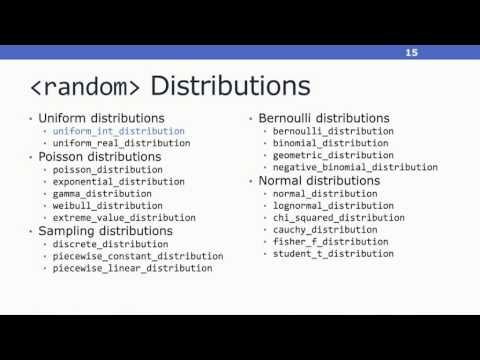

In [12]:
from IPython.display import YouTubeVideo

YouTubeVideo("LDPMpc-ENqY")

## References

```{bibliography}
:filter: docname in docnames
```